In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/


 123656.gdoc
 124103_copy.pdf
 124104_copy.pdf
 124106.gdoc
 3126_ANTRO_JENIFER.S_Certificate_copy.pdf
'Adobe Scan Jul 19, 2025 (1).pdf'
'Adobe Scan Jul 19, 2025.pdf'
'antro fees copy 1.pdf'
'antro interview questions (1).pdf'
'antro interview questions.pdf'
'antro Jenifer offer letters .pdf'
 Antro_Jenifer_S_certificate.png
'Antrojne.pdf (1).pdf'
'anyro fees 2.pdf'
'archive (3).zip'
'checker. (1).pdf'
 checker..pdf
'Colab Notebooks'
'Coursera aws cloud (1).pdf'
'Coursera aws cloud.pdf'
'Crack the Concept: AI & Data Quiz Showdown.pdf'
 dataset
'declaration by students and parents (2).docx'
'declaration by students and parents (2).gdoc'
'Git and GitHub.pdf'
 IMG_20250411_083943.jpg
 IMG_20250411_084251.jpg
'IMG-20250814-WA0005 (1).jpg'
 IMG-20250814-WA0005.jpg
 IMG-20250814-WA0008.jpg
 IMG-20250815-WA0034.jpg
 IMG-20251008-WA0007.jpg
 IMG-20251125-WA0000.jpg
'Interview Questions Antro (1).gdoc'
'Interview Questions Antro (1).pdf'
'Interview Questions Antro (2).pdf'
'Interview Questions 

In [ ]:
!ls /content/drive/MyDrive/dataset


glass  metal  organic  plastic	recyclable


In [ ]:
!find /content/drive/MyDrive/dataset -type f | wc -l


50


In [ ]:
!pip install tensorflow matplotlib seaborn opencv-python


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 4

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 40 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [ ]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
steps_per_epoch = max(1, train_generator.samples // BATCH_SIZE)
validation_steps = max(1, val_generator.samples // BATCH_SIZE)

print("Steps per epoch:", steps_per_epoch)
print("Validation steps:", validation_steps)


Steps per epoch: 10
Validation steps: 2


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=20
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.0923 - loss: 2.5965 - val_accuracy: 0.0000e+00 - val_loss: 1.9788
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 500ms/step - accuracy: 0.2487 - loss: 2.1950 - val_accuracy: 0.1250 - val_loss: 1.8683
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - accuracy: 0.3491 - loss: 1.6907 - val_accuracy: 0.1250 - val_loss: 1.7673
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.2503 - loss: 1.7321 - val_accuracy: 0.1250 - val_loss: 1.7127
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step - accuracy: 0.4232 - loss: 1.4014 - val_accuracy: 0.2500 - val_loss: 1.6610
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.5778 - loss: 1.3207 - val_accuracy: 0.2500 - val_loss: 1.5981
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.5779 - loss: 1.3224 - val_accuracy: 0.2500 - val_loss: 1.5185
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 0.6639 - loss: 1.0466 - val_accuracy: 

In [ ]:
model.save('/content/drive/MyDrive/waste_classifier.h5')


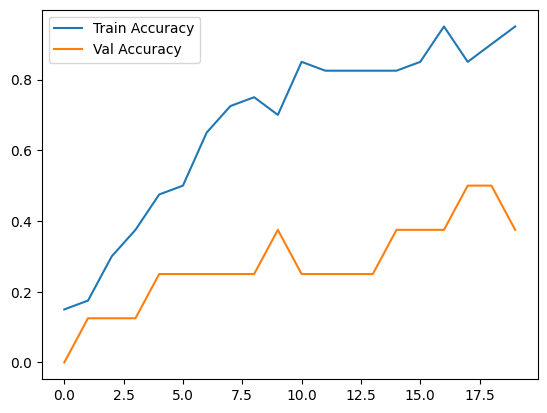

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


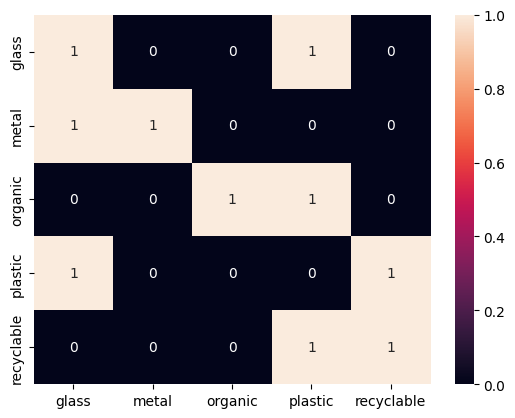

              precision    recall  f1-score   support

       glass       0.33      0.50      0.40         2
       metal       1.00      0.50      0.67         2
     organic       1.00      0.50      0.67         2
     plastic       0.00      0.00      0.00         2
  recyclable       0.50      0.50      0.50         2

    accuracy                           0.40        10
   macro avg       0.57      0.40      0.45        10
weighted avg       0.57      0.40      0.45        10



In [ ]:
val_generator.reset()

preds = model.predict(val_generator)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.show()

print(classification_report(
    y_true, y_pred,
    target_names=val_generator.class_indices.keys()
))


Saving organic6.jpg to organic6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: organic


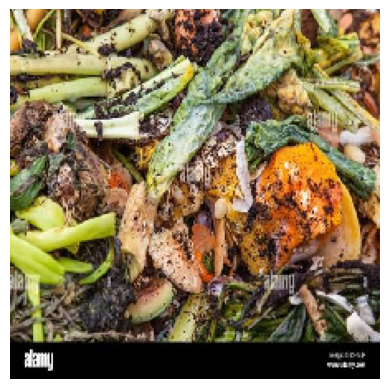

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()
class_names = list(train_generator.class_indices.keys())

for file in uploaded.keys():
    img = image.load_img(file, target_size=(224,224))
    img_arr = image.img_to_array(img)/255.0
    img_arr = np.expand_dims(img_arr, axis=0)

    pred = model.predict(img_arr)
    print("Predicted:", class_names[np.argmax(pred)])

    plt.imshow(img)
    plt.axis('off')
    plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


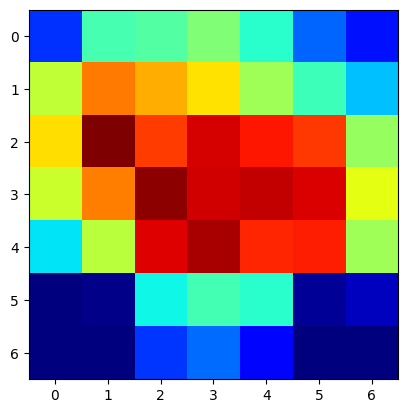

In [ ]:
def grad_cam(img_array, model, layer_name='Conv_1'):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_out, preds = grad_model(img_array)
        loss = preds[:, tf.argmax(preds[0])]

    grads = tape.gradient(loss, conv_out)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

    heatmap = tf.reduce_sum(pooled_grads * conv_out, axis=-1)
    heatmap = tf.maximum(heatmap[0], 0)
    heatmap /= tf.reduce_max(heatmap)
    return heatmap.numpy()

heatmap = grad_cam(img_arr, model)
plt.imshow(heatmap, cmap='jet')
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Waste_Classification_Model.h5')
